In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
#todays date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-19
time: 13:53:53


In [3]:
prompt1 = "Simulate PDB ID 1MBN at two different temperatures: 300 K and 400 K for 1 ns each. Plot the RMSD of both over time and compare the final secondary structures at the end of the simulations. Get information about this protein, such as the number of residues and chains, etc."
llm_var = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)

In [4]:
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

LLM:  accounts/fireworks/models/llama-v3p1-405b-instruct 
Temperature:  0.1


In [5]:
agent.run(prompt1)

Thought: First, I need to download the PDB file for 1MBN and then set up and run two simulations at different temperatures. After the simulations, I will compute the RMSD for each simulation and plot them over time. I will also compute the DSSP for the final frame of each simulation to compare their secondary structures. Finally, I will get information about this protein.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1MBN"
}
```
PDB file found with this ID: 1MBN
Thought: Now that I have the PDB file, I can set up and run the simulations at different temperatures. I will use the SetUpandRunFunction tool to run the simulations.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1MBN_135358",
        "forcefield_files": ["amber99sbildn.xml"],
        "save": true,
        "system_params": {
            "nonbondedMethod": "NoCutoff",
            "constraints": "None",
            "rigidWater": false
        },
        "inte

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [6]:
#print final date and time
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)

date and time: 2024-08-19
time: 15:09:08


In [10]:
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

Files found in registry: 1MBN_135358: PDB file downloaded from RSCB
 PDBFile ID: 1MBN_135358
 1MBN_135410: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_135416: Initial positions for simulation sim0_135416
 sim0_135416: Basic Simulation of Protein 1MBN_135410
 rec0_135416: Simulation trajectory for protein 1MBN_135410 and simulation sim0_135416
 rec1_135416: Simulation state log for protein 1MBN_135410 and simulation sim0_135416
 rec2_135416: Simulation pdb frames for protein 1MBN_135410 and simulation sim0_135416
 top_sim0_143106: Initial positions for simulation sim0_143106
 sim0_143106: Basic Simulation of Protein 1MBN_135410
 rec0_143107: Simulation trajectory for protein 1MBN_135410 and simulation sim0_143106
 rec1_143107: Simulation state log for protein 1MBN_135410 and simulation sim0_143106
 rec2_143107: Simulation pdb frames for protein 1MBN_1354

In [16]:
# let's see if we can't grab the plots

import re
import os
matches = re.findall(r"fig0_\d+", paths_and_descriptions)
file_id1 = matches[0]
file_id2 = matches[1]
path1 = registry.get_mapped_path(file_id1)
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path1)
assert os.path.exists(path2)
print(f"It's asserted that file paths for {file_id1} and {file_id2} exist")

It's asserted that file paths for fig0_150844 and fig0_150850 exist


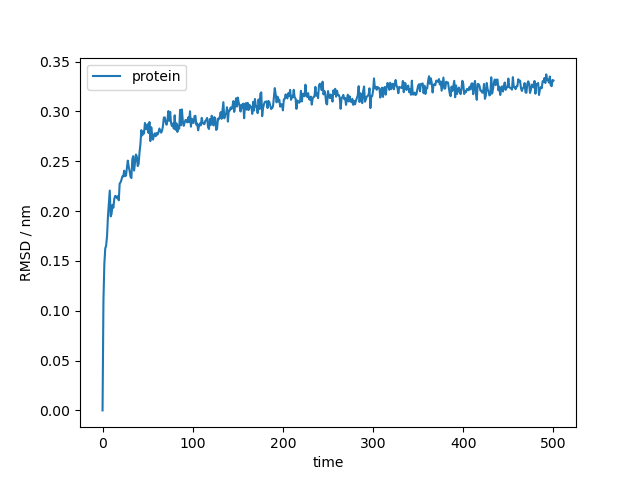

In [17]:
Image(filename=path1)

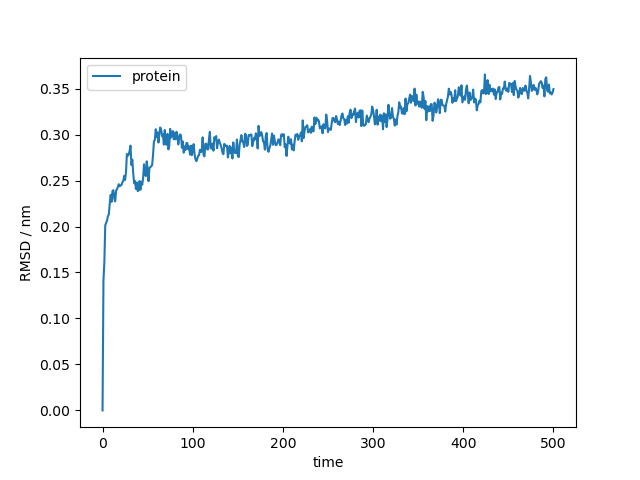

In [18]:
Image(filename=path2)

In [19]:
import re
import os
matches = re.findall(r"top_sim0_\d+", paths_and_descriptions)
file_id1 = matches[0]
file_id2 = matches[1]
path1 = registry.get_mapped_path(file_id1)
path2 = registry.get_mapped_path(file_id2)
assert os.path.exists(path1)
assert os.path.exists(path2)
print(f"It's asserted that file paths for {file_id1} and {file_id2} exist")

It's asserted that file paths for top_sim0_135416 and top_sim0_143106 exist


In [23]:
#secondary structure
import mdtraj as md

traj = md.load(path1)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  119
Number of residues in coils:  34


In [24]:
traj = md.load(path2)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  1
Number of residues in sheets:  0
Number of residues in helices:  119
Number of residues in coils:  34


# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors
2. Attempted all necessary steps
3. Completed without Hallucination 
4. Logic make sense
5. Correct Answer
